# Iris Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
data=pd.read_csv('Iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
data.shape

(150, 6)

In [5]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data=data.drop(columns=['Id'])
data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

# Hot Encoding of the Species column

In [8]:
encoder=LabelEncoder()
encoder.fit(data['Species'])
data['Species']=encoder.fit_transform(data['Species'])
dictionary=dict(enumerate(encoder.classes_))
print(dictionary)
data.head()

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

# Visualising Data

<Axes: >

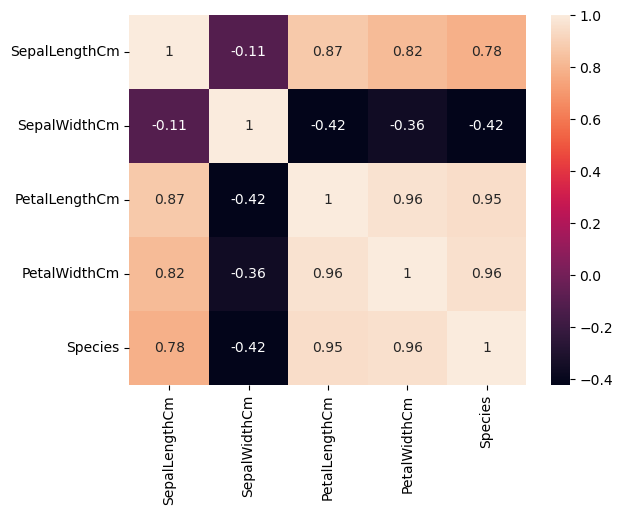

In [9]:
sns.heatmap(data.corr(),annot=True)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


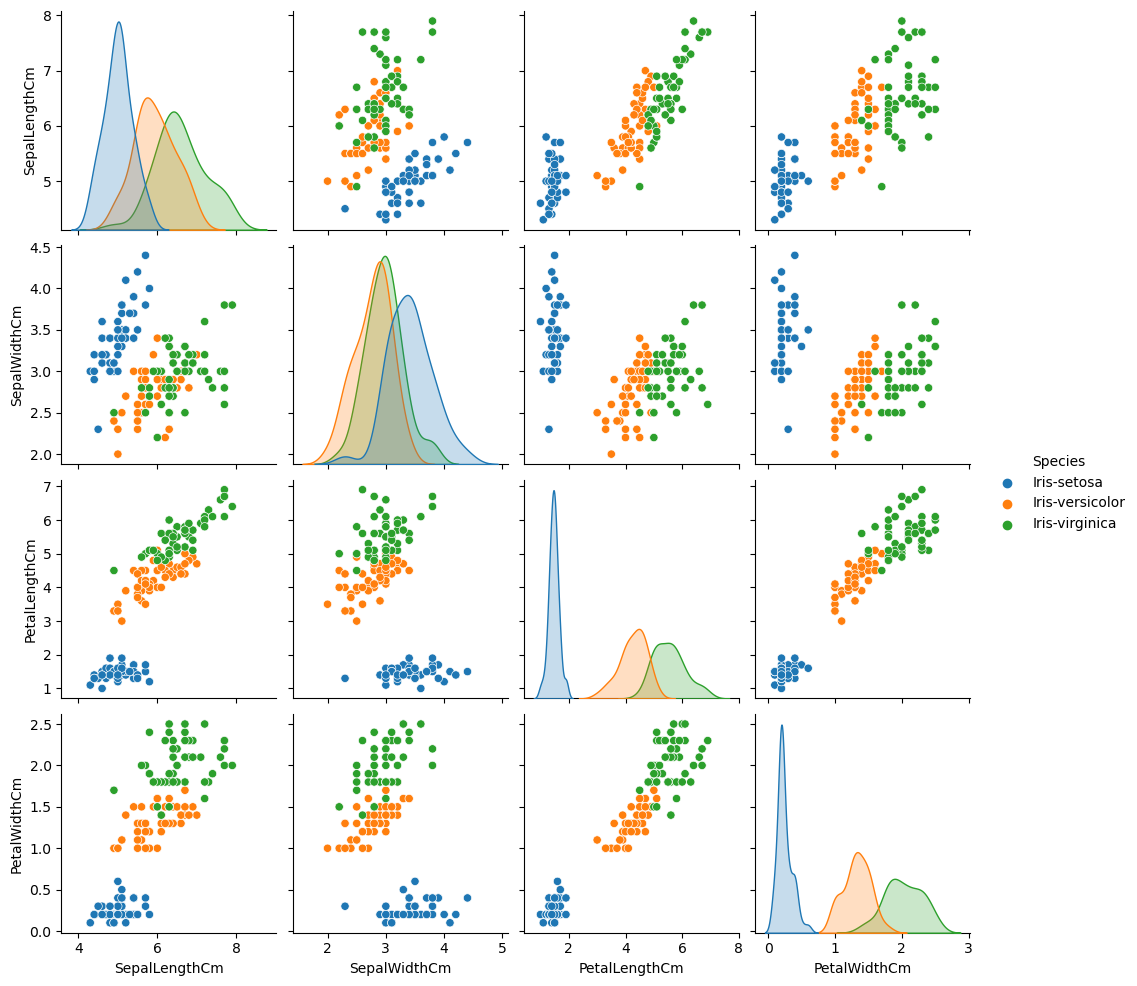

In [10]:
df=data.copy()
df['Species']=df['Species'].map(dictionary)
sns.pairplot(df, hue='Species',diag_kind='kde')

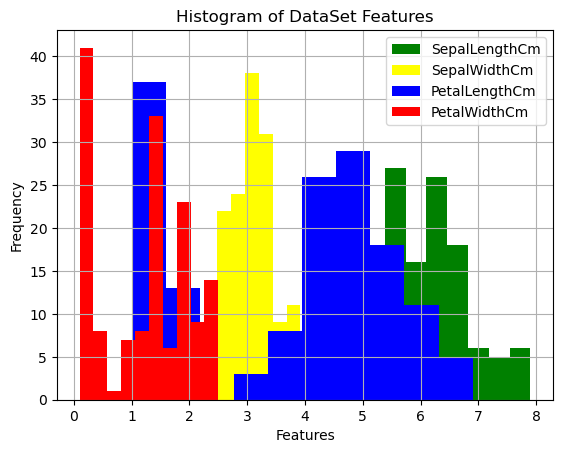

In [11]:
data['SepalLengthCm'].hist(color='green',label='SepalLengthCm')
data['SepalWidthCm'].hist(color='yellow',label='SepalWidthCm')
data['PetalLengthCm'].hist(color='blue',label='PetalLengthCm')
data['PetalWidthCm'].hist(color='red',label='PetalWidthCm')

plt.title('Histogram of DataSet Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Analysis as per above plots

# Histogram:

1. PetalWidthCm have lowest values.
2. SepalLengthCm seems to have higher values than any other features.
3. PetalLengthCm seems to have highest range.

# Pair Plot

1.Virginica seems to have higher SepalLengthCm per SepalWidthCm and PetalWidthCm, and higher PetalLengthCm per SepalWidthCm and PetalWidthCm.
2.Versicolor seems to have higher PetalLengthCm per PetalWidthCm and SepalWidthCm, and higher SepalLengthCm per SepalWidthCm and PetalWidthCm; however, have lower maximum values of all than Virginicia species' features' values.

# Scaling and Splitting of the Data

In [12]:
print('Range of Features before:')
print(data['SepalLengthCm'].max()-data['SepalLengthCm'].min())
print(data['SepalWidthCm'].max()-data['SepalWidthCm'].min())
print(data['PetalLengthCm'].max()-data['PetalLengthCm'].min())
print(data['PetalWidthCm'].max()-data['PetalWidthCm'].min())

Range of Features before:
3.6000000000000005
2.4000000000000004
5.9
2.4


In [13]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y=data[['Species']].values.flatten()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=36)
x_train[:5,],y_train[:5]

(array([[5.8, 2.7, 5.1, 1.9],
        [4.9, 3.1, 1.5, 0.1],
        [5.7, 2.8, 4.1, 1.3],
        [6.1, 3. , 4.9, 1.8],
        [6.1, 2.9, 4.7, 1.4]]),
 array([2, 0, 1, 2, 1]))

In [14]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train,y_train)
x_test_scale=scaler.fit_transform(x_test,y_test)

x_train_scale[:5,],x_test_scale[:5]

(array([[-0.01333569, -0.75003852,  0.77002924,  0.93677484],
        [-1.15899309,  0.17647965, -1.3255147 , -1.47535656],
        [-0.14063096, -0.51840898,  0.1879337 ,  0.13273104],
        [ 0.3685501 , -0.05514989,  0.65361014,  0.80276754],
        [ 0.3685501 , -0.28677944,  0.53719103,  0.26673834]]),
 array([[ 1.19117647,  0.17783263,  0.53239732,  0.26056861],
        [ 0.86029412, -0.29290081,  0.80280228,  1.39530289],
        [ 0.86029412, -0.05753409,  0.53239732,  0.3866502 ],
        [ 1.96323529, -1.2343677 ,  1.72217914,  1.39530289],
        [ 1.96323529, -0.76363426,  1.61401715,  1.01705813]]))

# Model Training

In [15]:
def accuracy_of_model(y_test, y_pred):
    print("Confusion Matrix =>\n{}".format(confusion_matrix(y_test,y_pred)))
    print('Accuracy Score => {}'.format(accuracy_score(y_test, y_pred)))

In [16]:
from sklearn.linear_model import LogisticRegression

mlogreg=LogisticRegression()
mlogreg.fit(x_train_scale,y_train)
y_train_pred=mlogreg.predict(x_train_scale)
print('Model evaluation for training data: ')
accuracy_of_model(y_train,y_train_pred)

y_test_pred=mlogreg.predict(x_test_scale)
print('\nModel evaluation for test data: ')
accuracy_of_model(y_test,y_test_pred)

Model evaluation for training data: 
Confusion Matrix =>
[[34  0  0]
 [ 0 34  2]
 [ 0  1 34]]
Accuracy Score => 0.9714285714285714

Model evaluation for test data: 
Confusion Matrix =>
[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
Accuracy Score => 0.9777777777777777


# Plot of Predicted to Actual Values

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


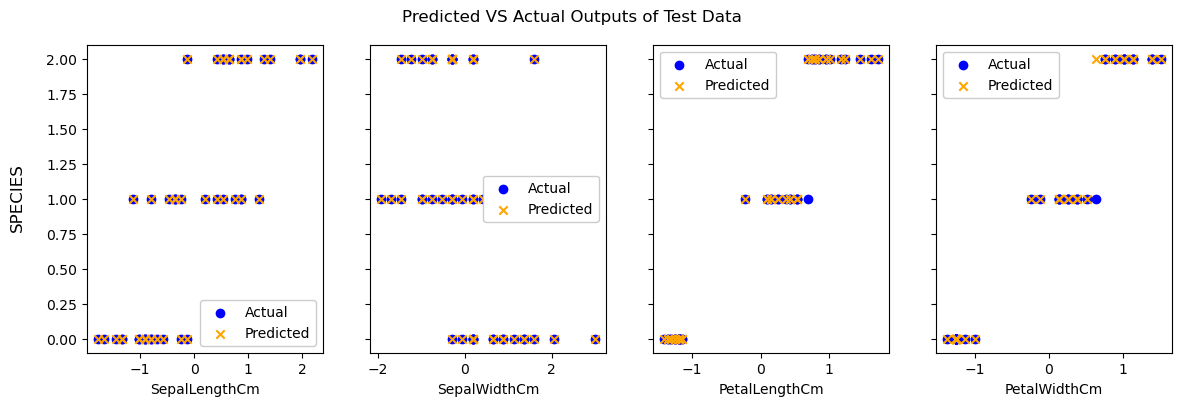

In [17]:
print(dictionary)

fig,ax=plt.subplots(1,4,figsize=(14,4),sharey=True)
col=0
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for triaxis in ax:
    triaxis.scatter(x_test_scale[:,col],y_test,color='blue',label='Actual')
    triaxis.scatter(x_test_scale[:,col],y_test_pred,color='orange',label='Predicted',marker='x')
    triaxis.set_xlabel(features[col])
    triaxis.legend(framealpha=1, frameon=True)
    col+=1
fig.text(0.07,0.5,'SPECIES',va='center',rotation='vertical',fontsize=12)
fig.text(0.35,0.95,'Predicted VS Actual Outputs of Test Data',va='center',rotation='horizontal',fontsize=12)
plt.show(); plt.close()